<h2> Modules

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures

<h2> Functions

<h3> Correlation Function

In [190]:
def correlacion(dataframe, grafica=True, matrix=False):
    '''Devuelve la matriz de correlación de un dataframe
    y sí grafica=True, muestra un mapa de calor de la matriz de correlación'''
    corr=dataframe.corr()                   
    if grafica==True:
      fig = plt.figure(figsize = (25, 20))
      ax = sns.heatmap(corr,
                       vmin = -1,
                       vmax = 1,
                       center = 0,
                       cmap = "coolwarm", 
                       annot = True,
                       fmt=".2f",
                       square = True)
      ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation = 45,
                         horizontalalignment ='right')
    if matrix==True:
      return corr

<h3> Train-Test Plot Function

In [191]:
def get_bounds(x, y, buffer=0.1):
    minval = np.nanmin(np.concatenate([x, y]))
    maxval = np.nanmax(np.concatenate([x, y]))
    minval -= buffer * minval
    maxval += buffer * minval
    return [minval, maxval]


def compare_pred_results(
    y_train,
    y_train_pred,
    y_test,
    y_test_pred,
    scale_factor=1,
    title="Predicted vs. Actual 12 month Oil Prod",
    xlabel="Current Oil Prod",
    ylabel="Predicted Oil Prod",
):

    y_train = y_train.copy() / scale_factor
    y_train_pred = y_train_pred.copy() / scale_factor
    y_test = y_test.copy() / scale_factor
    y_test_pred = y_test_pred.copy() / scale_factor

    fig, ax = plt.subplots(figsize=(6, 6))

    ax.scatter(y_train, y_train_pred, label="Train", color="#4c72b0")
    ax.scatter(y_test, y_test_pred, label="Test", color="#dd8452")

    bounds = get_bounds(y_test_pred, y_test)
    # trend = np.polyfit(y_train_pred, y_train, 1)
    # y_hat = np.poly1d(trend)
    # y_space = np.linspace(bounds[0], bounds[1], 100)
    plt.plot(bounds, bounds, "k")
    # ax.plot(y_space, y_hat(y_space), "k--", lw=1)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    ax.legend(fontsize=12)
    ax.set_xlim(bounds)
    ax.set_ylim(bounds)
    ax.set_aspect("equal")

        # text = f"$NRMSE_{{train}} = {np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))/np.mean(y_train):0.3f}$"
    # plt.gca().text(
    #     0.6,
    #     0.10,
    #     text,
    #     transform=plt.gca().transAxes,
    #     fontsize=14,
    #     verticalalignment="bottom",
    # )
    # text = f"$NRMSE_{{test}} = {np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))/np.mean(y_test):0.3f}$"
    # plt.gca().text(
    #     0.6,
    #     0.05,
    #     text,
    #     transform=plt.gca().transAxes,
    #     fontsize=14,
    #     verticalalignment="bottom",
    # )


<h3> Histograms Plot Function

In [192]:
def histograms(y1, y2):
    errors = (np.array(y1)- y2)
    media = np.mean(y1 - y2)           
    des_est = np.sqrt(np.var(y1 - y2))
    empirical_errors = np.random.choice(errors, 660)
    teorical_errors = np.random.normal(media, des_est, 660)
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey='all')
    for dat, subplot in zip((teorical_errors, empirical_errors), ax.flatten()):
        sns.histplot(x=dat, ax=subplot, kde=True, )    
    plt.show()    

<h3> Stats Functions

In [193]:
def stats(model, y1, y2):
    r2 = r2_score(y1, y2)
    mae =  mean_absolute_error(y1, y2)
    mse = mean_squared_error(y1, y2)
    rmse = np.sqrt(mse)
    print(f"{model[3:]} data: the r2 score is {r2:.3f}, the mae is {mae:.3f}, the mse is {mse:.3f} and the rmse is {rmse:.3f}")
    return [model, r2, mae, mse, rmse]

<h2> Reading Data

In [194]:
df_merged = pd.read_csv('Well_data_frac_prod_VM.csv')
df_merged = df_merged.drop(columns='Unnamed: 0')
df_merged

,idpozo,Lateral_length(m),Stage_Count,Fluid Pumped(bbl),Max_Pressure(psi),HorsePower(HP),Proppant Pumped(lb),Prop_int(lb/ft),Fluid_int(bbl/ft),Stage_frac_length(m),Prop/Fluid(lb/bbl),Rate(bbl/min),12 month Oil Prod,12 month Gas Prod,12 month Water Prod,Xcoor,Ycoor
0,154188.0,1061.1,14.0,88783.979,12000.0,28000.0,6.506749e+06,1868.966333,213.869383,75.792857,8.738821,95.200000,0.00,0.00000,0.00,-69.220829,-37.963007
1,156550.0,1367.5,18.0,110252.378,10356.0,22000.0,9.754518e+06,2174.063523,206.077680,75.972222,10.549728,86.674392,10037.60,1346.81000,2245.97,-68.665429,-38.265802
2,156473.0,1145.1,15.0,109868.059,11524.0,26000.0,7.607361e+06,2024.810478,245.243985,76.340000,8.256310,92.051371,5789.22,894.71000,1007.96,-68.631737,-38.303168
3,156320.0,1170.6,15.0,79499.310,12500.0,26000.0,7.320551e+06,1906.026862,173.590185,78.040000,10.980038,84.864000,6215.10,1036.03000,2418.97,-68.631733,-38.303708
4,156967.0,1464.4,18.0,113252.708,11215.0,24000.0,9.966128e+06,2074.247191,197.678393,81.355556,10.493040,87.311636,15903.48,1080.24000,1550.54,-68.662221,-38.098993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,162810.0,2550.0,34.0,239051.450,11972.0,2000.0,1.674188e+07,2001.049929,239.619153,75.000000,8.350960,6.815904,25784.28,2089.77000,4349.29,-68.466175,-38.342691
547,162811.0,2400.0,32.0,223829.650,11995.0,2000.0,1.582476e+07,2009.646749,238.383779,75.000000,8.430300,6.802835,29494.73,2540.88000,4962.41,-68.466005,-38.342690
548,162314.0,1275.0,20.0,224468.714,11044.0,28000.0,1.048716e+07,2506.925047,450.003571,63.750000,5.570900,103.440782,17807.25,8318.61633,6906.08,-69.345480,-37.470910
549,162315.0,2059.0,32.0,352925.610,10600.0,28000.0,1.680736e+07,2487.923166,438.124111,64.343750,5.678581,107.773585,18994.97,5318.81459,19274.68,-69.345480,-37.470910


<h2> Data Exploration

In [195]:
df_merged.set_index('idpozo', inplace=True)

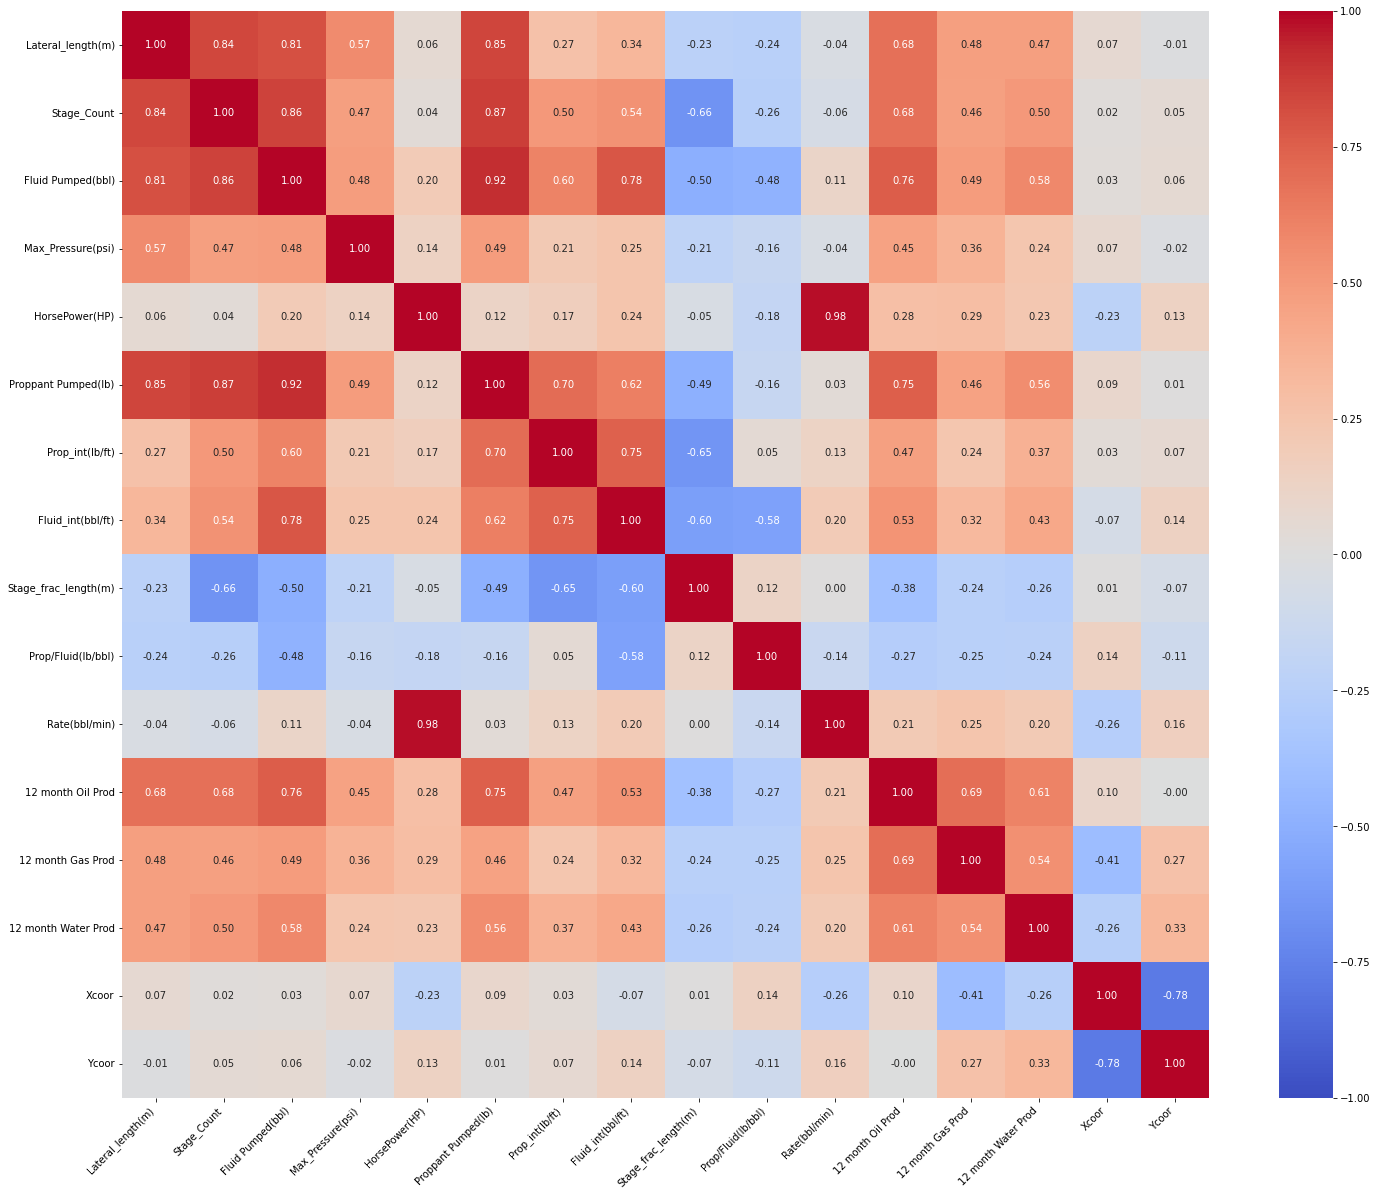

In [196]:
corr_matrix = correlacion(df_merged, grafica=True, matrix=True)

<AxesSubplot:>

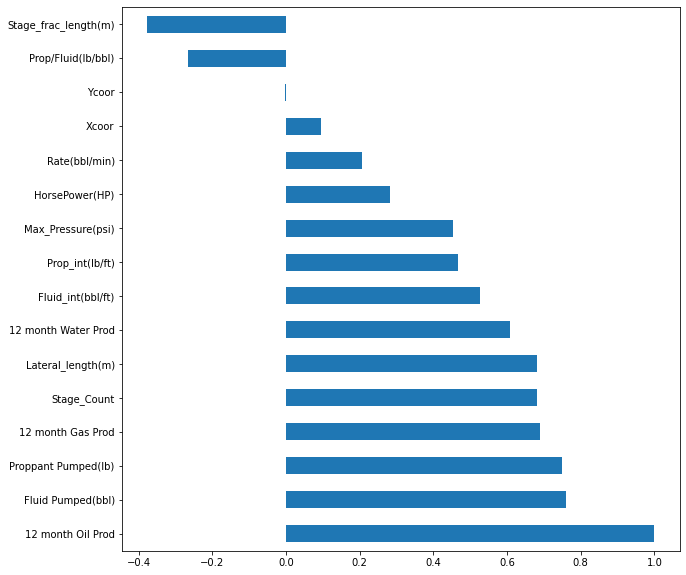

In [197]:
plt.figure(figsize = (10,10))
df_merged.corr()['12 month Oil Prod'].sort_values(ascending = False).plot(kind ='barh',)

In [198]:
df_merged.describe()

,Lateral_length(m),Stage_Count,Fluid Pumped(bbl),Max_Pressure(psi),HorsePower(HP),Proppant Pumped(lb),Prop_int(lb/ft),Fluid_int(bbl/ft),Stage_frac_length(m),Prop/Fluid(lb/bbl),Rate(bbl/min),12 month Oil Prod,12 month Gas Prod,12 month Water Prod,Xcoor,Ycoor
count,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,1932.974465,27.927405,234640.550241,11603.219886,27992.049453,1.397756e+07,2160.258413,300.334885,72.836084,7.483502,98.587639,20537.100192,3510.642872,5727.527476,-68.681349,-38.278632
std,613.252828,11.506606,114886.794242,1034.925383,12499.319176,6.000895e+06,508.685410,93.326027,13.387722,1.613626,43.044171,15057.034201,3275.950560,6483.597741,0.182153,0.217505
min,180.000000,3.000000,10164.640000,7169.000000,2000.000000,3.681715e+05,498.725375,88.322245,24.324324,3.920531,6.357616,0.000000,0.000000,0.000000,-69.404340,-38.833272
25%,1452.650000,18.000000,137274.847000,11019.000000,22549.135000,9.424949e+06,1885.982524,233.988535,63.840000,6.367162,77.781836,8408.590000,1387.415000,1348.620000,-68.710461,-38.371840
50%,1984.300000,27.000000,230736.070000,11702.000000,32000.000000,1.377214e+07,2048.319850,282.611105,75.068421,6.960175,115.619270,17126.240000,2432.370000,3365.920000,-68.652956,-38.337484
75%,2442.150000,35.000000,307140.164992,12100.000000,40000.000000,1.789659e+07,2448.551005,354.516756,79.344583,8.501827,132.092231,29933.075000,4741.060000,7552.070000,-68.577818,-38.225097
max,3888.000000,71.000000,583162.757200,20473.000000,50000.000000,3.789698e+07,4935.863226,767.972922,166.071429,14.984560,161.366872,75507.280000,27179.310000,43725.183000,-68.294423,-37.350948


<h2> Feature Selection

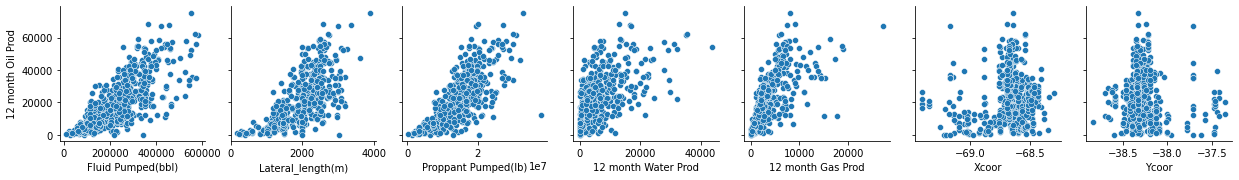

In [199]:
features = ['Fluid Pumped(bbl)', 'Lateral_length(m)', 'Proppant Pumped(lb)', '12 month Water Prod', '12 month Gas Prod', 'Xcoor', 'Ycoor']

target = '12 month Oil Prod'

g = sns.pairplot(df_merged, x_vars=features, y_vars=target)
plt.show()

In [200]:
X = df_merged[features]
y = df_merged[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=50)

<h2> Random Forest Regressor

In [201]:
rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


In [202]:
rf_train_data = stats('RF Train', y_train, y_train_pred)
rf_test_data = stats('RF Test', y_test, y_test_pred)

Train data: the r2 score is 0.980, the mae is 1381.968, the mse is 4944551.713 and the rmse is 2223.635
Test data: the r2 score is 0.859, the mae is 3610.691, the mse is 25606613.105 and the rmse is 5060.298


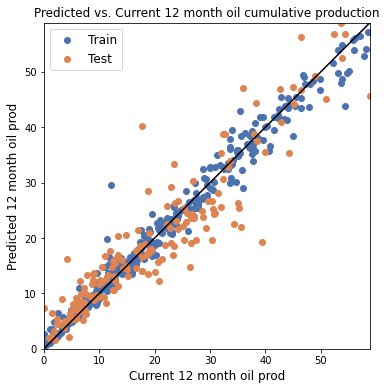

In [203]:
compare_pred_results(y_train, y_train_pred, y_test, y_test_pred, scale_factor=1000, title="Predicted vs. Current 12 month oil cumulative production",
                     xlabel="Current 12 month oil prod", ylabel="Predicted 12 month oil prod")

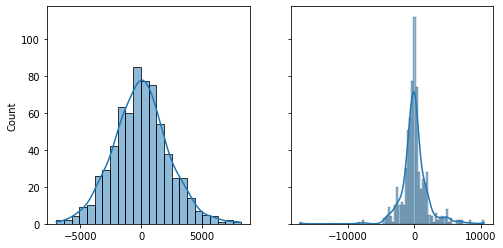

In [204]:
histograms(y_train, y_train_pred)

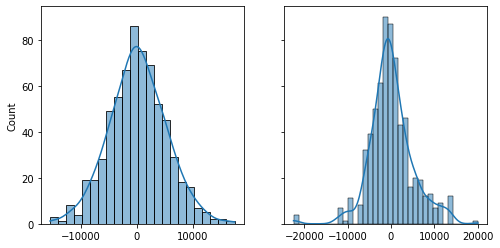

In [205]:
histograms(y_test, y_test_pred)

<h2> Linear Regression

In [206]:
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [207]:
lr_train_data = stats('LR Train', y_train, y_train_pred)
lr_test_data = stats('LR Test', y_test, y_test_pred)

Train data: the r2 score is 0.813, the mae is 5023.804, the mse is 45811451.900 and the rmse is 6768.416
Test data: the r2 score is 0.823, the mae is 4628.585, the mse is 32257743.688 and the rmse is 5679.590


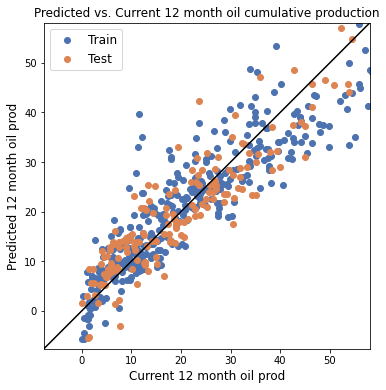

In [208]:
compare_pred_results(y_train, y_train_pred, y_test, y_test_pred, scale_factor=1e3, title="Predicted vs. Current 12 month oil cumulative production",
                     xlabel="Current 12 month oil prod", ylabel="Predicted 12 month oil prod")

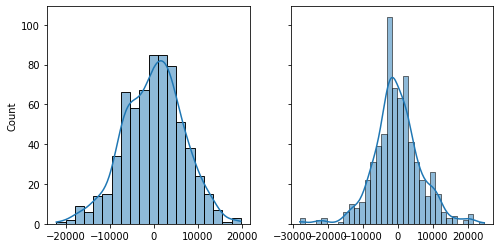

In [209]:
histograms(y_train, y_train_pred)

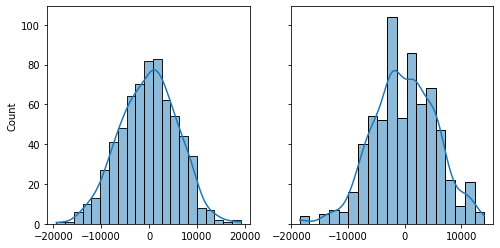

In [210]:
histograms(y_test, y_test_pred)

<h2> Huber Regression

In [211]:
hr = HuberRegressor(epsilon=1.35,   max_iter=1000,  alpha=0,  warm_start=False, 
                    fit_intercept=True, tol=1e-05)

hr = hr.fit(X_train, y_train)

y_pred = hr.predict(X_test)

y_train_pred = hr.predict(X_train)
y_test_pred = hr.predict(X_test)

In [212]:
hr_train_data = stats('HR Train', y_train, y_train_pred)
hr_test_data = stats('HR Test', y_test, y_test_pred)

Train data: the r2 score is 0.700, the mae is 6244.135, the mse is 73556978.726 and the rmse is 8576.537
Test data: the r2 score is 0.727, the mae is 5636.955, the mse is 49787118.469 and the rmse is 7055.999


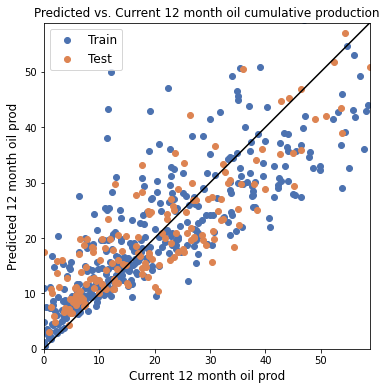

In [213]:
compare_pred_results(y_train, y_train_pred, y_test, y_test_pred, scale_factor=1e3, title="Predicted vs. Current 12 month oil cumulative production",
                     xlabel="Current 12 month oil prod", ylabel="Predicted 12 month oil prod")

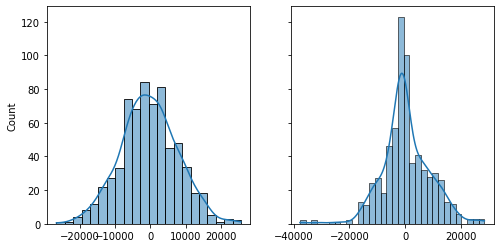

In [214]:
histograms(y_train, y_train_pred)

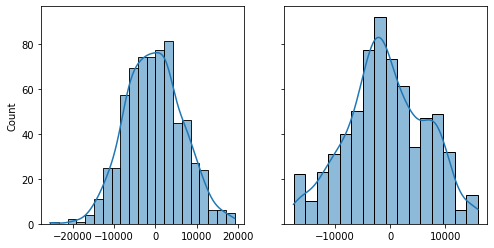

In [215]:
histograms(y_test, y_test_pred)

<h2> Polynomial Regression

In [216]:
polynomial_features = PolynomialFeatures(degree=2)
X_poly= polynomial_features.fit_transform(X)


In [217]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, 
                                                    test_size=0.3, 
                                                    shuffle=True,
                                                    )

In [218]:
lr_poly = LinearRegression().fit(X_train, y_train)

y_pred = lr_poly.predict(X_test)

y_train_pred = lr_poly.predict(X_train)
y_test_pred = lr_poly.predict(X_test)

In [219]:
poly_train_data = stats('PR Train', y_train, y_train_pred)
poly_test_data = stats('PR Test', y_test, y_test_pred)

Train data: the r2 score is 0.925, the mae is 3040.523, the mse is 17340526.887 and the rmse is 4164.196
Test data: the r2 score is 0.865, the mae is 3775.458, the mse is 28733125.401 and the rmse is 5360.329


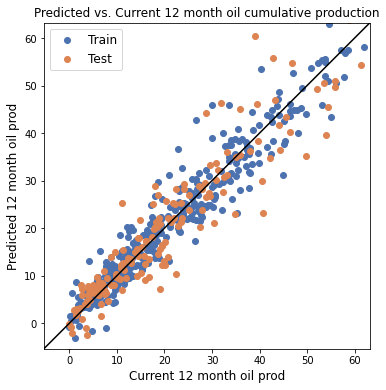

In [220]:
compare_pred_results(y_train, y_train_pred, y_test, y_test_pred, scale_factor=1e3, title="Predicted vs. Current 12 month oil cumulative production",
                     xlabel="Current 12 month oil prod", ylabel="Predicted 12 month oil prod")

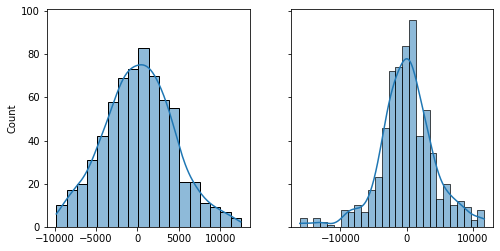

In [221]:
histograms(y_train, y_train_pred)

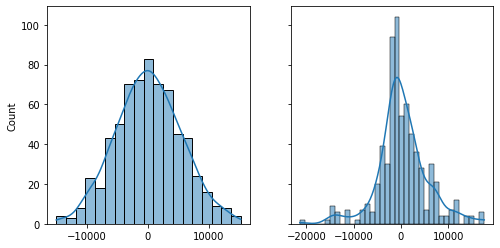

In [222]:
histograms(y_test, y_test_pred)

<h2> Regression Benchmarking

In [223]:
model_list = [rf_train_data, rf_test_data, lr_train_data, lr_test_data, hr_train_data, hr_test_data, poly_train_data, poly_test_data]
df_model = pd.DataFrame(columns=['Model','R2','MAE', 'MSE', 'RMSE'])
for model in model_list:
      df_model.loc[len(df_model)] = model

df_model.round(3)


,Model,R2,MAE,MSE,RMSE
0,RF Train,0.980,1381.968,4.944552e+06,2223.635
1,RF Test,0.859,3610.691,2.560661e+07,5060.298
2,LR Train,0.813,5023.804,4.581145e+07,6768.416
3,LR Test,0.823,4628.585,3.225774e+07,5679.590
4,HR Train,0.700,6244.135,7.355698e+07,8576.537
5,HR Test,0.727,5636.955,4.978712e+07,7055.999
6,PR Train,0.925,3040.523,1.734053e+07,4164.196
7,PR Test,0.865,3775.458,2.873313e+07,5360.329


In [224]:
df_model.set_index('Model', inplace=True)


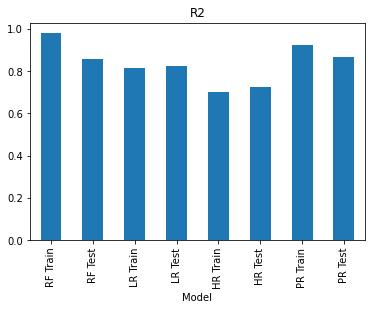

In [225]:
df_model['R2'].plot(kind='bar', title='R2')
plt.show()

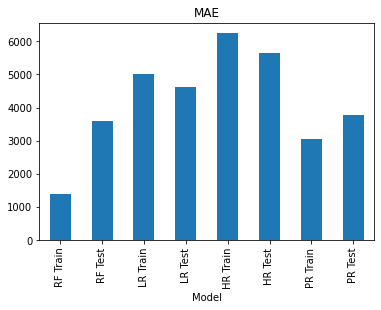

In [226]:
df_model['MAE'].plot(kind='bar', title='MAE')
plt.show()

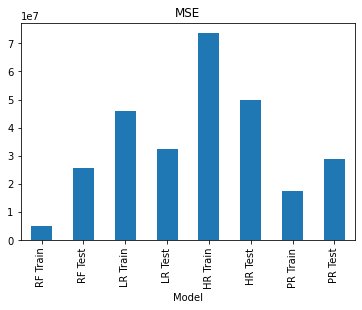

In [227]:
df_model['MSE'].plot(kind='bar', title='MSE')
plt.show()

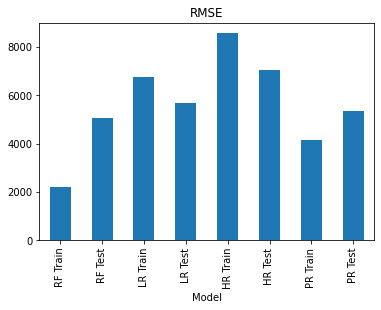

In [228]:
df_model['RMSE'].plot(kind='bar', title='RMSE')
plt.show()